In [2]:
import sys
sys.path.append("../python")

from importlib import reload
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio
import evaluations
import json
import math

from matplotlib.colors import ListedColormap
cmap_blue = ListedColormap(["white", "lightsteelblue", "cornflowerblue", "royalblue", "blue", "navy"])
cmap = ListedColormap(["white", "darkorange", "gold", "navy", "steelblue", "yellowgreen"])

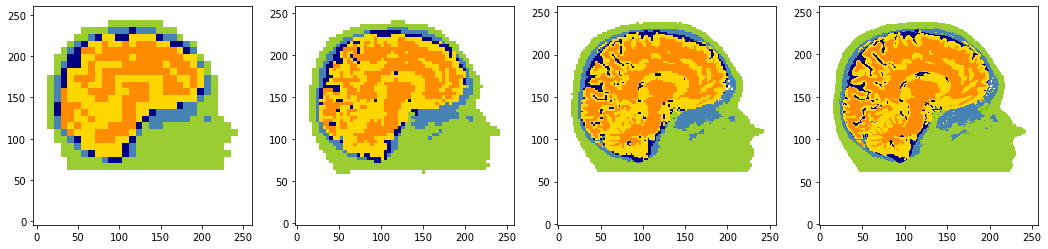

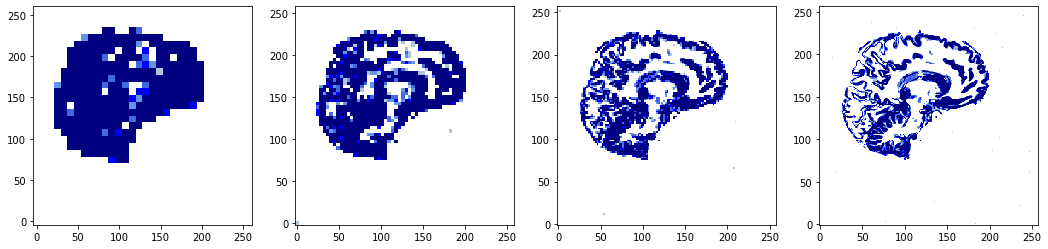

In [14]:
mesh_paths = [
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_32.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_64.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_128.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_256.npz"
    ]

num_cells = [32,64,128,256]

fig, axis = plt.subplots(1,4,figsize=(18,6))
#axis_list = [axis[0,0],axis[0,1],axis[1,0],axis[1,1]]

for i in range(4):
    mesh = np.load(mesh_paths[i])

    elements = mesh['elements']
    labels = mesh['labels']
    gray_probs = mesh['gray_probs']

    n = int(math.sqrt(len(elements)))

    x = np.linspace(0,256,num_cells[i])
    z = np.ndarray((n,n),float)

    for k in range(n):
        for j in range(n):
            z[j,k] = labels[k+n*j]

    axis[i].pcolormesh(x,x,z,cmap=cmap)
    axis[i].set_aspect(1)

fig, axis = plt.subplots(1,4,figsize=(18,6))
for i in range(4):
    mesh = np.load(mesh_paths[i])

    elements = mesh['elements']
    labels = mesh['labels']
    gray_probs = mesh['gray_probs']

    n = int(math.sqrt(len(elements)))

    x = np.linspace(0,256,num_cells[i])
    g = np.ndarray((n,n),float)

    for k in range(n):
        for j in range(n):
            g[j,k] = gray_probs[k+n*j]

    axis[i].pcolormesh(x,x,g,cmap=cmap_blue)
    axis[i].set_aspect(1)

In [ ]:
electrodes_paths = [
    "/home/anne/Masterarbeit/masterarbeit/2d/data/electrodes_1.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/electrodes_2.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/electrodes_3.npz"
]